X = UΣV^T
We can approximate for first r columns

If X is a 2D image, we approximate it with a handfull of r columns and rows

This is a compression

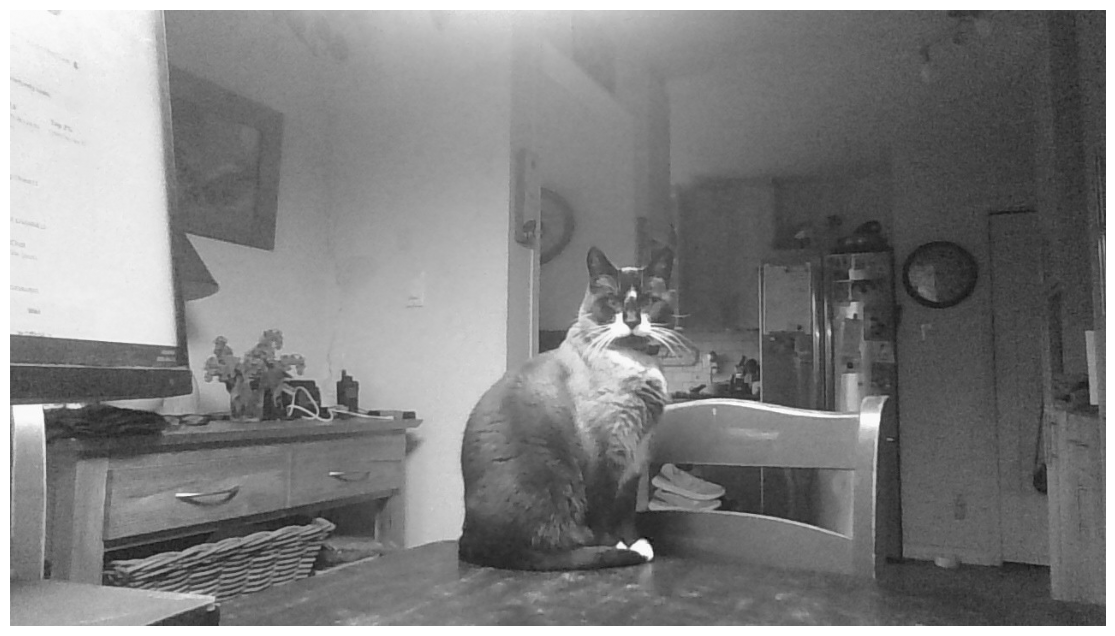

In [4]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize'] = [16, 8]

A = imread('cat.jpg')
X = np.mean(A, -1)  # convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [7]:
# Compute SVD
U, S, VT = np.linalg.svd(X, full_matrices=False) 
#economy SVD is full_matroces=False(first M columns of U corresponding to non-zero singular values)
S = np.diag(S) 



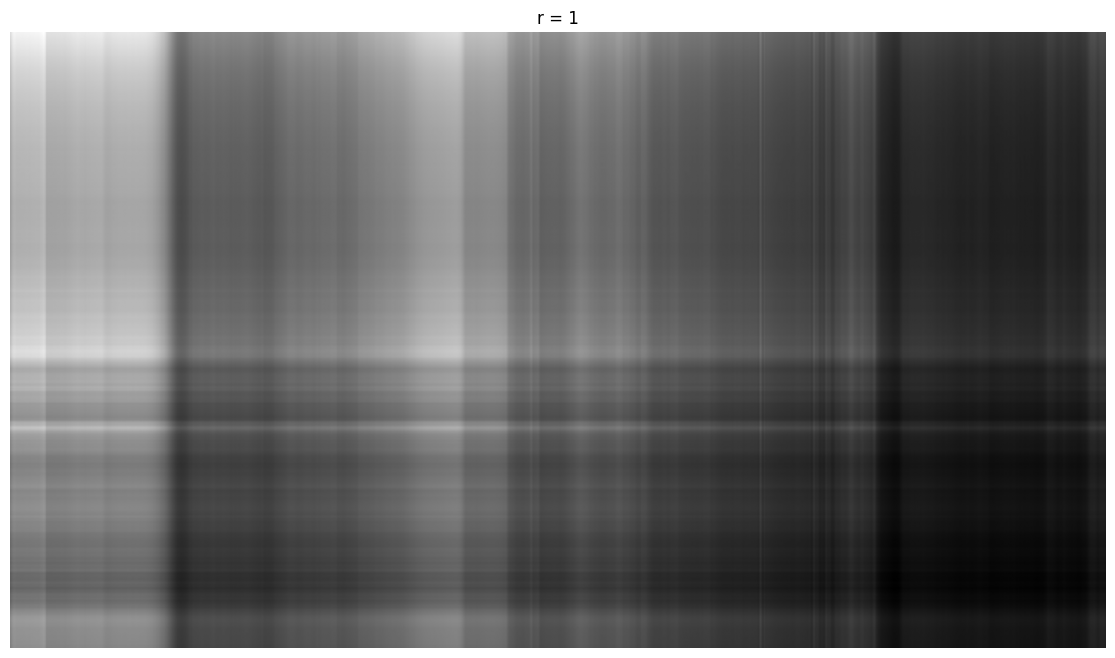

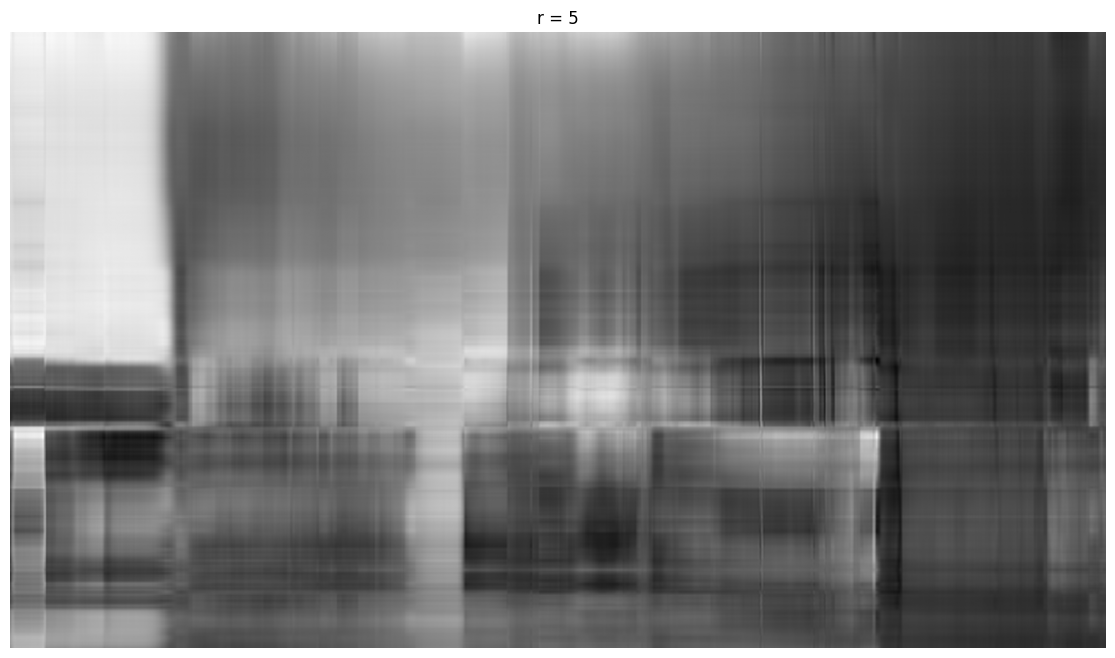

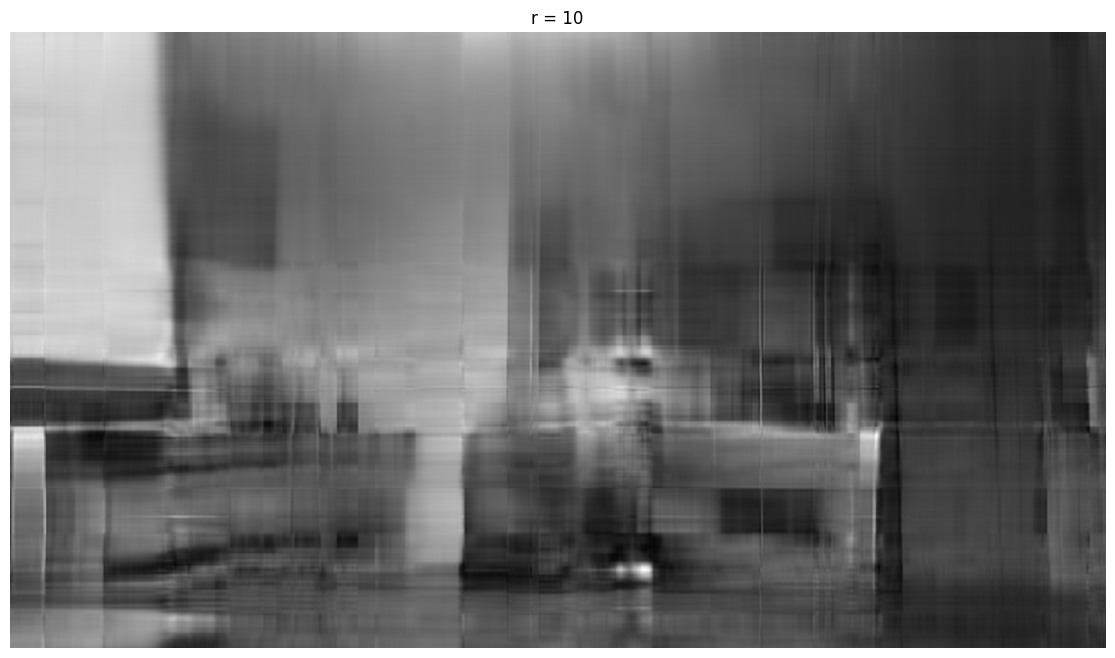

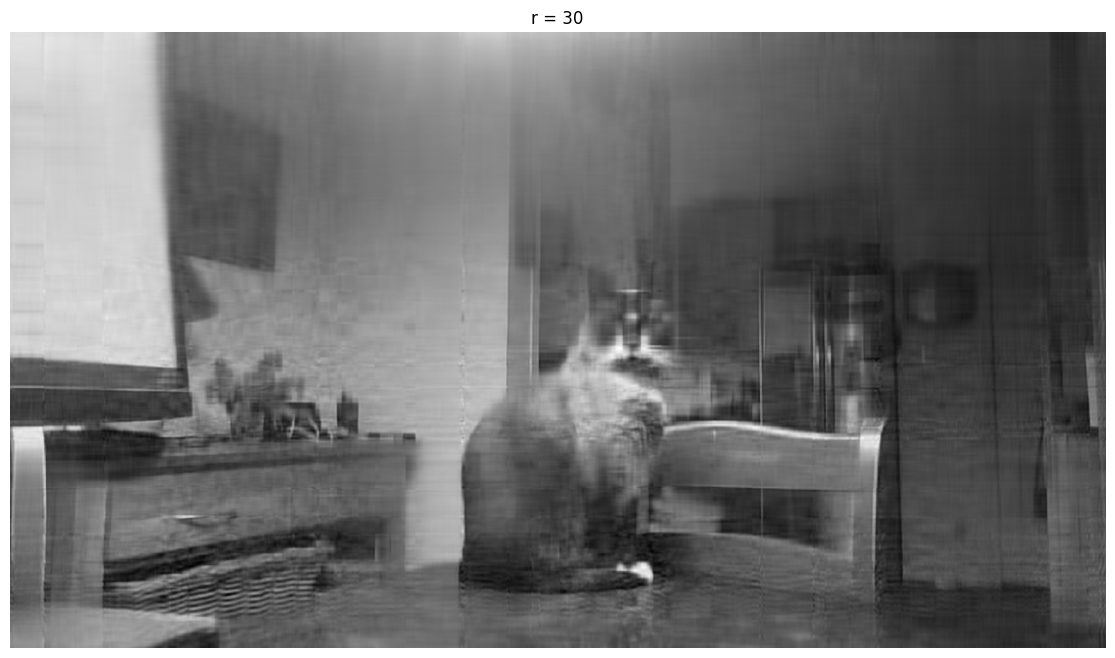

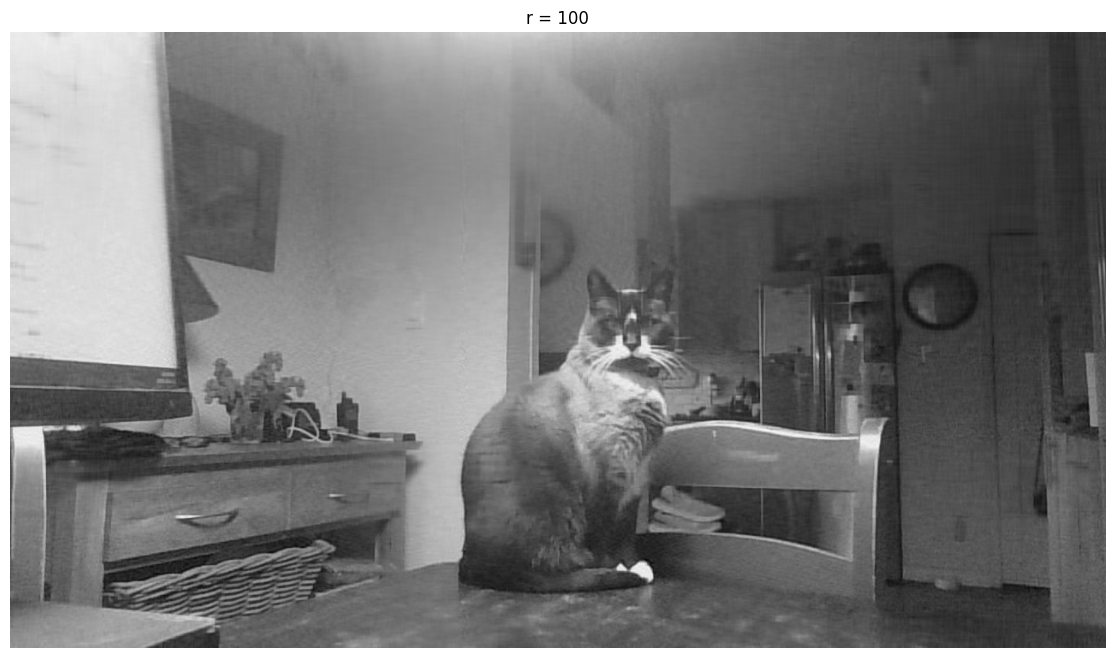

In [15]:
# Construct low rank approximations of cat

j = 0 
for r in(1, 5, 10, 30, 100):
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title(f"r = {r}")
    plt.show()

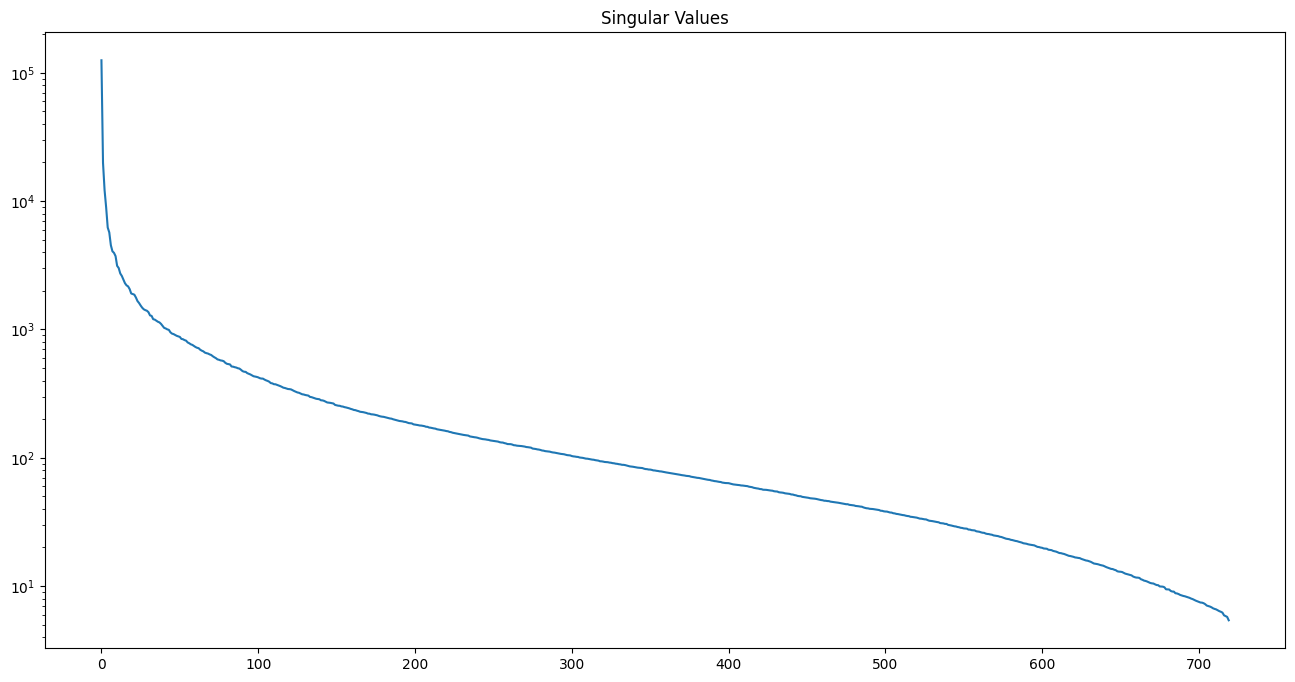

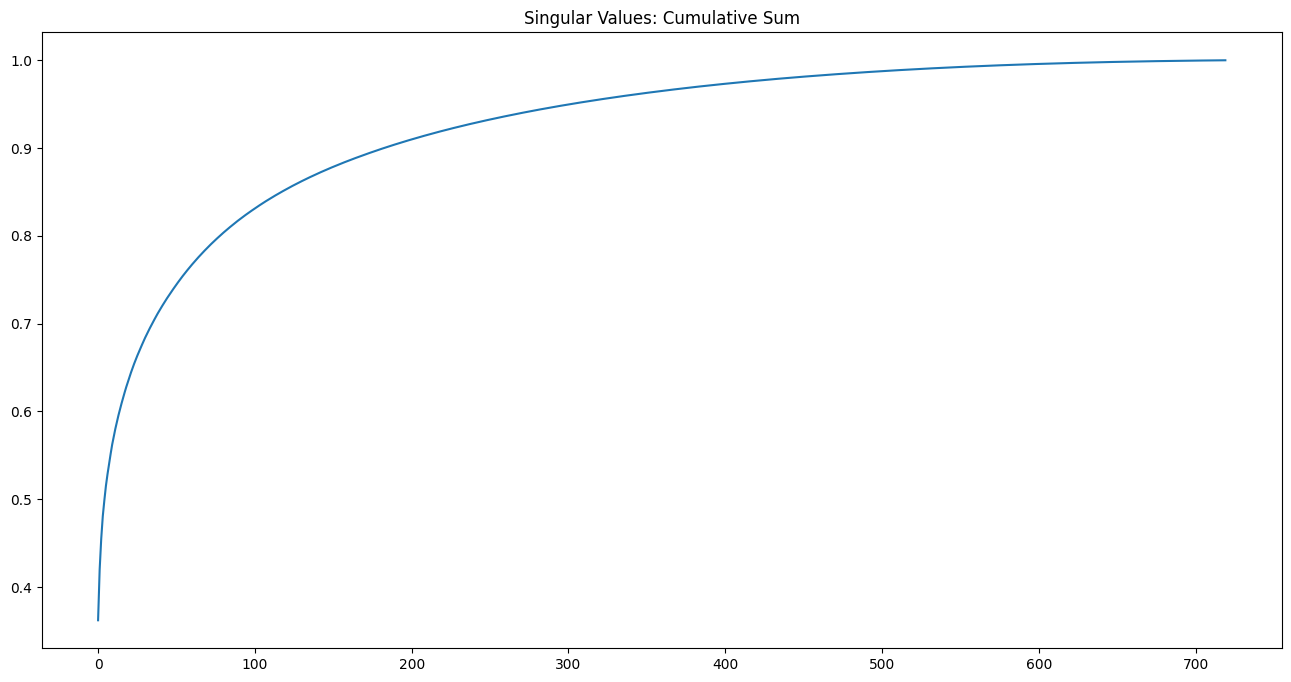

In [ ]:
# Plot singular values
 
# lots of energy in the first few modes. thus we can get away with just using the first few values 
# (hence r = 30 works well)
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()